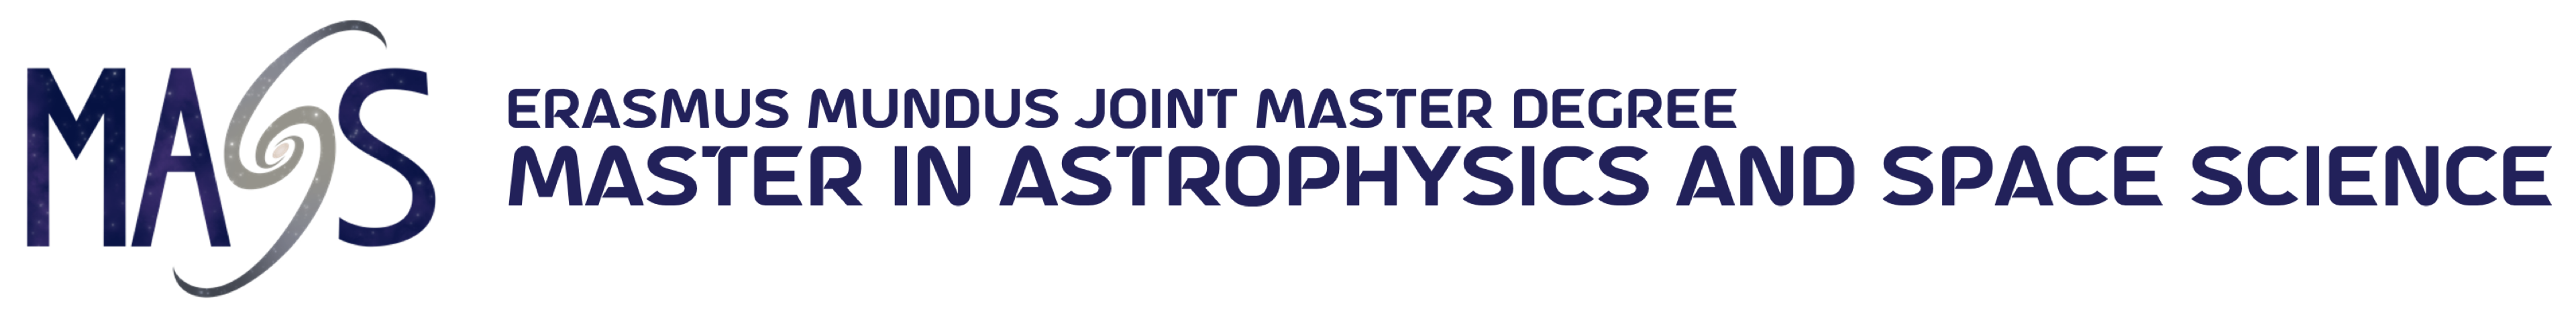


# CCD Photometry with 1.4m Milankovic telescope: basic data reduction and aperture photometry of AGN

**Photometry Data Reduction**

_Final project, Astrophysical Data Reduciton and Analysis Techniques_

Jan 2025

Student: Francesca Borg

Instructor: Prof. Dragana Ilić

Astronomical image data reduction is a necessary first step in astronomical data analysis. For 
photometry, three basic requirements are to correct for bias, flat-field, and dark current. These steps 
are then followed with the astrometric calibration.

The basic principle of aperture photometry is to integrate the observed flux within a given aperture (radius from the center of an object), then subtract the total contribution of the sky background within the same region, calculating only the flux from the object to calculate an instrumental magnitude. Furthermore, the instrumental magnitude can be converted to the absolute magnitude using the standard stars (or a non-varying star from the same field of view).

## Aim

For the below objects observed on October 22, 2023 with 1.4m Milankovic, using iKonL CCD in the following filters: B, V, R, Ha, SII, red-continuum, perform the standard data reduction procedure and 
calculate aperture photometry to measure the flux of the AGN.

|Object | Ra | Dec | V |
|-|-|-|-|
|1. Mrk335|00 06 19|+20 12 10|V=13.85| 
|2. Mrk6| 06 52 12 | +74 25 37 | V=14.19|
|3. Mrk817 |  14 36 22 | +58 47 39 | V=12.8|


Note: some calibration files have been aquired on Oct 22, 2023 using different CCD readout mode, thus 
you can use the calibration files from Oct 14, 2023 (data also provided).

## Tasks
1. Perform basic CDD image reduction in all filters for at least one object, using the pipeline for 1.4 Milankovic telescope: https://github.com/anavudragovic/pipeline;
2. Obtain instrumental magnitudes. Experiment with the aperture radius and test how much the 
object magnitude changes.
3. Perform absolute photometric calibration. For the standard stars use the stars from the same 
field (check literature or previous tutorials), check the results with several stars.  

## Task 1: CCD image reduction

Install the necessary dependancies using pip in the working environment.
Move the calibration files (flat, bias, dark) from 14_10_2023 into the working directory with the observations 22_10_2023.

```
psutil v5.9.0
ccdproc v2.4.2
astropy v5.3.4
photutils v1.13.0
scipy v1.13.1
twirl v0.4.2
pandas v2.2.2
```

Inside this folder clone the folder from the repository:
```
git clone https://github.com/anavudragovic/pipeline
```

Run the pipeline code on our files:
```
run pipeline/reduce.py -c -b -s
```

which performs: <br>
`reduce.py` = standard data reduction (bias, dark, flat-field corrections) -> `_cal`<br>
`c` = correction for hot/dead pixels -> `_fix`<br>
`b` = correction for large scale background variations -> `_skyflat`<br>
where `s` = stores intermediate files,

finally giving: `_cal_fix_skyflat.fit` files for each object.

Now we check our images to make sure there are no light sources.

In [1]:
#import the necessary packages
from astropy.io import fits
import matplotlib.pylab as plt
from astropy.visualization import ZScaleInterval
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
from collections import defaultdict

### B band

In [2]:
biasFile =  fits.open('22_10_2023/calibration/mBias.fits')
flatIFile = fits.open('22_10_2023/calibration/mFlat_B.fits')
skyIFile = fits.open('22_10_2023/calibration/mSkyflat_B.fits')
darkFile = fits.open('22_10_2023/calibration/mDark_600sec.fits')

In [3]:
bias = biasFile[0].data
flatI = flatIFile[0].data
skyI = skyIFile[0].data
dark = darkFile[0].data
z = ZScaleInterval()
zminb,zmaxb = z.get_limits(bias)
zminf,zmaxf = z.get_limits(flatI)
zmins,zmaxs = z.get_limits(skyI)
zmind,zmaxd = z.get_limits(dark)

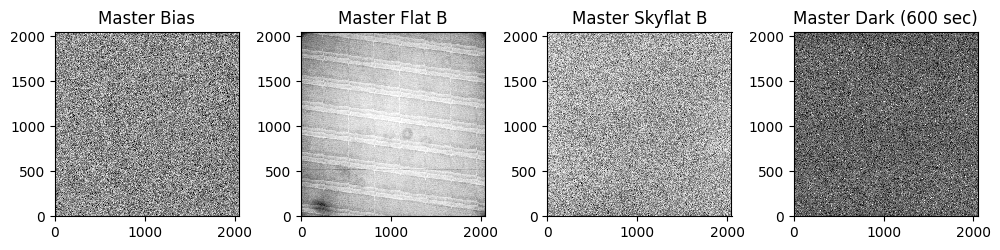

In [4]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(10, 4), nrows=1, ncols=4)
fig.tight_layout() 
ax1.imshow(bias, origin='lower', cmap='Greys_r', vmin=zminb, vmax=zmaxb, interpolation='nearest'); ax1.set_title('Master Bias');
ax2.imshow(flatI, origin='lower', cmap='Greys_r', vmin=zminf, vmax=zmaxf, interpolation='nearest'); ax2.set_title('Master Flat B');
ax3.imshow(skyI, origin='lower', cmap='Greys_r', vmin=zmins, vmax=zmaxs, interpolation='nearest'); ax3.set_title('Master Skyflat B');
ax4.imshow(dark, origin='lower', cmap='Greys_r', vmin=zmind, vmax=zmaxd, interpolation='nearest'); ax4.set_title('Master Dark (600 sec)');

### R band

In [5]:
biasFile =  fits.open('22_10_2023/calibration/mBias.fits')
flatIFile = fits.open('22_10_2023/calibration/mFlat_R.fits')
skyIFile = fits.open('22_10_2023/calibration/mSkyflat_R.fits')
darkFile = fits.open('22_10_2023/calibration/mDark_5sec.fits')

In [6]:
bias = biasFile[0].data
flatI = flatIFile[0].data
skyI = skyIFile[0].data
dark = darkFile[0].data
z = ZScaleInterval()
zminb,zmaxb = z.get_limits(bias)
zminf,zmaxf = z.get_limits(flatI)
zmins,zmaxs = z.get_limits(skyI)
zmind,zmaxd = z.get_limits(dark)

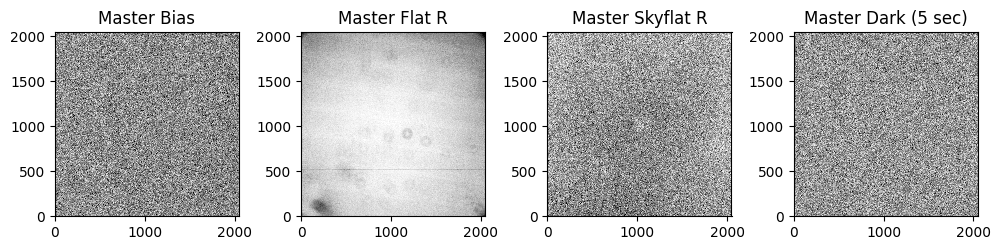

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(10, 4), nrows=1, ncols=4)
fig.tight_layout() 
ax1.imshow(bias, origin='lower', cmap='Greys_r', vmin=zminb, vmax=zmaxb, interpolation='nearest'); ax1.set_title('Master Bias');
ax2.imshow(flatI, origin='lower', cmap='Greys_r', vmin=zminf, vmax=zmaxf, interpolation='nearest'); ax2.set_title('Master Flat R');
ax3.imshow(skyI, origin='lower', cmap='Greys_r', vmin=zmins, vmax=zmaxs, interpolation='nearest'); ax3.set_title('Master Skyflat R');
ax4.imshow(dark, origin='lower', cmap='Greys_r', vmin=zmind, vmax=zmaxd, interpolation='nearest'); ax4.set_title('Master Dark (5 sec)');

### V band

In [8]:
biasFile =  fits.open('22_10_2023/calibration/mBias.fits')
flatIFile = fits.open('22_10_2023/calibration/mFlat_V.fits')
skyIFile = fits.open('22_10_2023/calibration/mSkyflat_V.fits')
darkFile = fits.open('22_10_2023/calibration/mDark_200sec.fits')

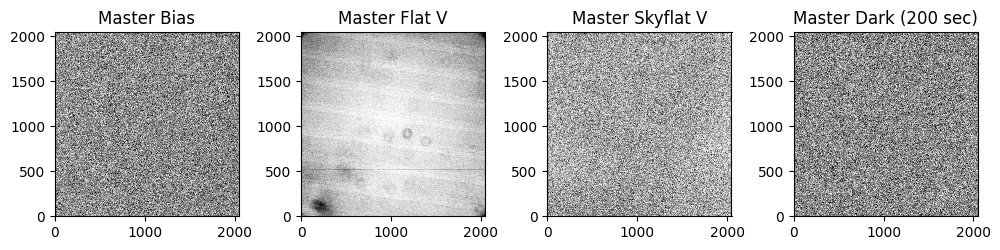

In [9]:
bias = biasFile[0].data
flatI = flatIFile[0].data
skyI = skyIFile[0].data
dark = darkFile[0].data
z = ZScaleInterval()
zminb,zmaxb = z.get_limits(bias)
zminf,zmaxf = z.get_limits(flatI)
zmins,zmaxs = z.get_limits(skyI)
zmind,zmaxd = z.get_limits(dark)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(10, 4), nrows=1, ncols=4)
fig.tight_layout() 
ax1.imshow(bias, origin='lower', cmap='Greys_r', vmin=zminb, vmax=zmaxb, interpolation='nearest'); ax1.set_title('Master Bias');
ax2.imshow(flatI, origin='lower', cmap='Greys_r', vmin=zminf, vmax=zmaxf, interpolation='nearest'); ax2.set_title('Master Flat V');
ax3.imshow(skyI, origin='lower', cmap='Greys_r', vmin=zmins, vmax=zmaxs, interpolation='nearest'); ax3.set_title('Master Skyflat V');
ax4.imshow(dark, origin='lower', cmap='Greys_r', vmin=zmind, vmax=zmaxd, interpolation='nearest'); ax4.set_title('Master Dark (200 sec)');

### Ha, Ha continuum, SII

In [10]:
skyIFile_Ha = fits.open('22_10_2023/calibration/mSkyflat_Ha.fits')
skyIFile_HaCont = fits.open('22_10_2023/calibration/mSkyflat_HaContinuum.fits')
skyIFile_SII = fits.open('22_10_2023/calibration/mSkyflat_SII.fits')

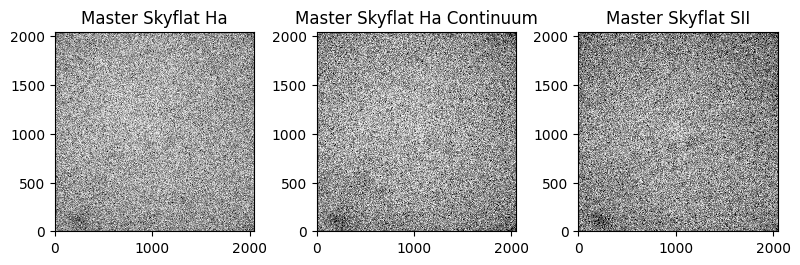

In [11]:
sky_Ha = skyIFile_Ha[0].data
sky_HaCont = skyIFile_HaCont[0].data
sky_SII = skyIFile_SII[0].data

z = ZScaleInterval()
zminb,zmaxb = z.get_limits(sky_Ha)
zminf,zmaxf = z.get_limits(sky_HaCont)
zmins,zmaxs = z.get_limits(sky_SII)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(8, 4), nrows=1, ncols=3)
fig.tight_layout() 
ax1.imshow(sky_Ha, origin='lower', cmap='Greys_r', vmin=zminb, vmax=zmaxb, interpolation='nearest'); ax1.set_title('Master Skyflat Ha');
ax2.imshow(sky_HaCont, origin='lower', cmap='Greys_r', vmin=zminf, vmax=zmaxf, interpolation='nearest'); ax2.set_title('Master Skyflat Ha Continuum');
ax3.imshow(sky_SII, origin='lower', cmap='Greys_r', vmin=zmins, vmax=zmaxs, interpolation='nearest'); ax3.set_title('Master Skyflat SII');

## Task 2: Obtaining instrumental magnitudes

To measure photometry on the images corrected to the background sky gradient:

```
python pipeline/reduce.py -b -a -p -l
```

`a` = astrometrically solve science frames (using `twirl`) so that target object and comparison stars can be located in each frame -> `_wcs`, which will create `_cal_fix_skyflat_wcs.fit` files in `/astrometry/` folder. <br>
`p` = measure photometry (using `photutils`), which will create `_cal_fix_skyflat_wcs.txt` files in `/photometry/` folder. <br>
`l` = creates png images with all selected or predefined sources circled in each science frame stored in `/photometry/`.

Note that the instrumental magnitudes of the objects are derived using the following formula: $$m_\rm{instr}=-2.5\log(\rm{flux})$$

Note: the instrumental magnitude depends on the specific filter.

The radius for aperture photometry is:
$$R=3 \times FWHM$$
describing an annulus radius starting 10 pix away from the aperture radius and spanning for 10 pixels. Three sigma clipping (for removing outliers) is done in the sky annulus.

The output ASCII files with photometric measurements for each individual science frame are created and stored in `/photometry/`. One example is illustrated below, obtained using:

```
head -2 'photometry_fwhm3/Mrk6-0001_B_cal_skyflat_wcs.txt'
```

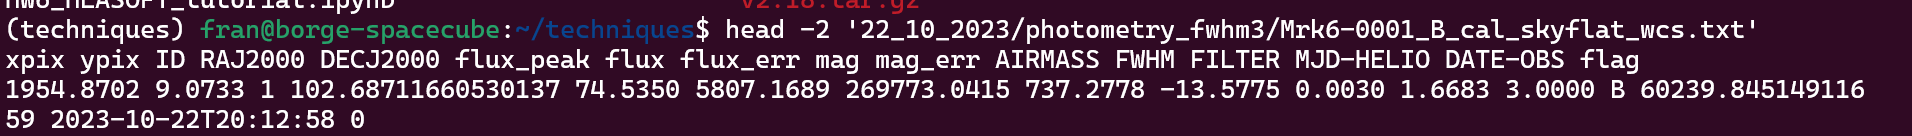

Note that by default, FWHM = 3 pix. First, we check the magnitudes obtained for Object Mrk335 using this setting, then we experiment with different radii e.g. 4, 2 to observe effects on the object magnitudes in each band.

In [12]:
# Function to extract sorting keys
def extract_sort_keys(filename):
    match = re.match(r"(?P<object>.+?)-(?P<frame>\d+?)_(?P<filter>[A-Za-z]+)_cal_skyflat_wcs\.txt", filename)
    if match:
        return (match.group("object"), int(match.group("frame")), match.group("filter"))
    return ("", 0, "")  # Fallback values for unmatched patterns

In [13]:
# check the magnitudes
#load up filenames
files=[]

for filename in os.listdir("22_10_2023/photometry_fwhm3/"): #set path here if necessary
    if filename.endswith('.png'):
        pass
    elif filename.endswith('.txt'):
       files.append(filename)

# Sort the filenames using the extracted keys
sorted_filenames = sorted(files, key=extract_sort_keys)

print(sorted_filenames)

['Mrk335-0001_B_cal_skyflat_wcs.txt', 'Mrk335-0001_Ha_cal_skyflat_wcs.txt', 'Mrk335-0001_R_cal_skyflat_wcs.txt', 'Mrk335-0001_SII_cal_skyflat_wcs.txt', 'Mrk335-0001_V_cal_skyflat_wcs.txt', 'Mrk335-0001_cnt_cal_skyflat_wcs.txt', 'Mrk335-0002_B_cal_skyflat_wcs.txt', 'Mrk335-0002_Ha_cal_skyflat_wcs.txt', 'Mrk335-0002_R_cal_skyflat_wcs.txt', 'Mrk335-0002_SII_cal_skyflat_wcs.txt', 'Mrk335-0002_V_cal_skyflat_wcs.txt', 'Mrk335-0002_cnt_cal_skyflat_wcs.txt', 'Mrk335-0003_B_cal_skyflat_wcs.txt', 'Mrk335-0003_Ha_cal_skyflat_wcs.txt', 'Mrk335-0003_R_cal_skyflat_wcs.txt', 'Mrk335-0003_SII_cal_skyflat_wcs.txt', 'Mrk335-0003_V_cal_skyflat_wcs.txt', 'Mrk335-0003_cnt_cal_skyflat_wcs.txt', 'Mrk6-0001_B_cal_skyflat_wcs.txt', 'Mrk6-0001_Ha_cal_skyflat_wcs.txt', 'Mrk6-0001_R_cal_skyflat_wcs.txt', 'Mrk6-0001_SII_cal_skyflat_wcs.txt', 'Mrk6-0001_V_cal_skyflat_wcs.txt', 'Mrk6-0001_cnt_cal_skyflat_wcs.txt', 'Mrk6-0002_B_cal_skyflat_wcs.txt', 'Mrk6-0002_Ha_cal_skyflat_wcs.txt', 'Mrk6-0002_R_cal_skyflat_wcs.txt

In [14]:
filename = sorted_filenames[0]
print('We look at file: ', filename)

We look at file:  Mrk335-0001_B_cal_skyflat_wcs.txt


In [15]:
# Function to extract object name, frame index, and filter
def parse_filename(filename):
    # Regular expression to match the pattern
    match = re.match(r"(?P<object>.+?)-(?P<frame>\d+?)_(?P<filter>[A-Za-z]+)_cal_skyflat_wcs\.txt", filename)
    if match:
        return {
            "filename": filename,
            "object_name": match.group("object"),
            "frame_index": int(match.group("frame")),
            "filter": match.group("filter")
        }
    return None

In [16]:
#for a singular object
parsed = parse_filename(filename)
obj_name = parsed['object_name']
obj_frame = parsed['frame_index']                                                        
obj_filt = parsed['filter']
file_name= parsed['filename']

print('File name: ', file_name)
print('Object name: ', obj_name)
print('Frame number: ', obj_frame)
print('Filter: ', obj_filt)

File name:  Mrk335-0001_B_cal_skyflat_wcs.txt
Object name:  Mrk335
Frame number:  1
Filter:  B


In [17]:
# Retrieve files related to a specific object
def get_files_for_object(object_name, grouped_files):
    return grouped_files.get(object_name, [])

In [18]:
#collect file names relating to a singular object
grouped_files = defaultdict(list)

# Process all filenames
for f in files:
    parsed = parse_filename(f)
    object_name, full_filename = parsed['object_name'], parsed['filename']
    if object_name:
        grouped_files[object_name].append(full_filename)

# Display grouped filenames
for object_name, files in grouped_files.items():
    print(f"Object: {object_name}")
    for file in files:
        print(f"  {file}")

Object: Mrk335
  Mrk335-0003_SII_cal_skyflat_wcs.txt
  Mrk335-0002_B_cal_skyflat_wcs.txt
  Mrk335-0001_V_cal_skyflat_wcs.txt
  Mrk335-0001_cnt_cal_skyflat_wcs.txt
  Mrk335-0003_R_cal_skyflat_wcs.txt
  Mrk335-0002_Ha_cal_skyflat_wcs.txt
  Mrk335-0001_Ha_cal_skyflat_wcs.txt
  Mrk335-0003_B_cal_skyflat_wcs.txt
  Mrk335-0002_V_cal_skyflat_wcs.txt
  Mrk335-0001_R_cal_skyflat_wcs.txt
  Mrk335-0001_SII_cal_skyflat_wcs.txt
  Mrk335-0002_R_cal_skyflat_wcs.txt
  Mrk335-0002_SII_cal_skyflat_wcs.txt
  Mrk335-0003_V_cal_skyflat_wcs.txt
  Mrk335-0001_B_cal_skyflat_wcs.txt
  Mrk335-0003_Ha_cal_skyflat_wcs.txt
  Mrk335-0002_cnt_cal_skyflat_wcs.txt
  Mrk335-0003_cnt_cal_skyflat_wcs.txt
Object: Mrk6
  Mrk6-0001_SII_cal_skyflat_wcs.txt
  Mrk6-0001_cnt_cal_skyflat_wcs.txt
  Mrk6-0002_Ha_cal_skyflat_wcs.txt
  Mrk6-0002_R_cal_skyflat_wcs.txt
  Mrk6-0001_R_cal_skyflat_wcs.txt
  Mrk6-0001_Ha_cal_skyflat_wcs.txt
  Mrk6-0002_SII_cal_skyflat_wcs.txt
  Mrk6-0002_cnt_cal_skyflat_wcs.txt
  Mrk6-0002_V_cal_skyflat_w

In [19]:
#retreive files only for our selected object
target_object = "Mrk335"
files_for_mrk335 = get_files_for_object(target_object, grouped_files)

# Sort the filenames using the extracted keys
files_for_mrk335_sorted = sorted(files_for_mrk335, key=extract_sort_keys)

print(files_for_mrk335_sorted)

['Mrk335-0001_B_cal_skyflat_wcs.txt', 'Mrk335-0001_Ha_cal_skyflat_wcs.txt', 'Mrk335-0001_R_cal_skyflat_wcs.txt', 'Mrk335-0001_SII_cal_skyflat_wcs.txt', 'Mrk335-0001_V_cal_skyflat_wcs.txt', 'Mrk335-0001_cnt_cal_skyflat_wcs.txt', 'Mrk335-0002_B_cal_skyflat_wcs.txt', 'Mrk335-0002_Ha_cal_skyflat_wcs.txt', 'Mrk335-0002_R_cal_skyflat_wcs.txt', 'Mrk335-0002_SII_cal_skyflat_wcs.txt', 'Mrk335-0002_V_cal_skyflat_wcs.txt', 'Mrk335-0002_cnt_cal_skyflat_wcs.txt', 'Mrk335-0003_B_cal_skyflat_wcs.txt', 'Mrk335-0003_Ha_cal_skyflat_wcs.txt', 'Mrk335-0003_R_cal_skyflat_wcs.txt', 'Mrk335-0003_SII_cal_skyflat_wcs.txt', 'Mrk335-0003_V_cal_skyflat_wcs.txt', 'Mrk335-0003_cnt_cal_skyflat_wcs.txt']


In [20]:
#choose the first file to check values individually.
filename = files_for_mrk335_sorted[0]
print(filename)

Mrk335-0001_B_cal_skyflat_wcs.txt


In [21]:
# Load data (photometric)
data_path1 = os.path.join("22_10_2023/photometry_fwhm3/", filename)
data1 = pd.read_csv(data_path1, delim_whitespace=True)

/tmp/ipykernel_2425/1844651379.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data1 = pd.read_csv(data_path1, delim_whitespace=True)


In [22]:
data1['mag'].describe()

count    74.000000
mean    -11.151807
std       1.874948
min     -17.008600
25%     -11.952025
50%     -10.871850
75%      -9.698550
max      -8.251800
Name: mag, dtype: float64

In [23]:
data1['mag'].head(10)

0    -9.5033
1    -9.6149
2   -11.5480
3   -10.1640
4    -8.7908
5    -9.1655
6    -9.6216
7   -10.9304
8   -10.9466
9    -8.3749
Name: mag, dtype: float64

these are the results using FWHM of 3.

Now, we will experiment with FWHM of 4, creating a new photometry folder.

In [24]:
# Load data (photometric)
data_path2 = os.path.join("22_10_2023/photometry_fwhm4/", filename)
data2 = pd.read_csv(data_path2, delim_whitespace=True)

/tmp/ipykernel_2425/2005210763.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data2 = pd.read_csv(data_path2, delim_whitespace=True)


In [25]:
data2['mag'].describe()

count    74.000000
mean    -11.192847
std       1.873419
min     -17.049100
25%     -11.985200
50%     -10.909550
75%      -9.730550
max      -8.261100
Name: mag, dtype: float64

In [26]:
data2['mag'].head(10)

0    -9.4926
1    -9.6495
2   -11.5797
3   -10.1520
4    -8.9402
5    -9.0758
6    -9.7097
7   -10.9269
8   -11.0130
9    -8.2611
Name: mag, dtype: float64

Only minimal differences (e.g. see: maximum).

Now, try with a FWHM of 2.

In [27]:
# Load data (photometric)
data_path3 = os.path.join("22_10_2023/photometry_fwhm2/", filename)
data3 = pd.read_csv(data_path3, delim_whitespace=True)

/tmp/ipykernel_2425/775269861.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data3 = pd.read_csv(data_path3, delim_whitespace=True)


In [28]:
data3['mag'].describe()

count    74.000000
mean    -11.047743
std       1.846799
min     -16.800500
25%     -11.844825
50%     -10.712200
75%      -9.594400
max      -8.218100
Name: mag, dtype: float64

In [29]:
data3['mag'].head(10)

0    -9.3438
1    -9.5768
2   -11.4094
3   -10.0243
4    -8.8178
5    -9.3142
6    -9.3368
7   -10.8362
8   -10.7717
9    -8.5419
Name: mag, dtype: float64

## Side-by-side and graphical comparison

In [30]:
#comparing these values next to each other.

# Define a function to extract the statistics and first values for a given dataframe
def extract_stats(dataframe, column_name):
    stats = dataframe[column_name].describe()  # Get statistics
    stats_values = [
        stats['count'], stats['mean'], stats['std'], stats['min'],
        stats['25%'], stats['50%'], stats['75%'], stats['max']
    ]
    return stats_values

# Assuming data1, data2, data3, data4 are dataframes and 'mag' is the target column
dataframes = {'Data1': data1, 'Data2': data2, 'Data3': data3}
column_name = 'mag'

# Extract stats and head values dynamically
stats_data_dynamic = {}
for key, df in dataframes.items():
    describe = extract_stats(df, column_name)
    stats_data_dynamic[f"{key}_Describe"] = describe

index = [
    "Count", "Mean", "Std", "Min",
    "25%", "50%", "75%", "Max"
]

# Create the final table dynamically
table_dynamic = pd.DataFrame(stats_data_dynamic, index=index)
table_dynamic

# Define a mapping of dataset keys to their corresponding radii (R values)
radii_mapping = {'Data1': 9, 'Data2': 12, 'Data3': 6}

# Sort the keys of the stats_data_dynamic dictionary by their radius values
sorted_keys = sorted(stats_data_dynamic.keys(), key=lambda k: radii_mapping[k.split('_')[0]])

# Update column names to include the radius in the label
updated_columns = {key: f"{key.split('_')[0]} (R={radii_mapping[key.split('_')[0]]})" for key in sorted_keys}

# Create the final table with sorted and labeled columns
table_dynamic_reordered = pd.DataFrame(
    {updated_columns[key]: stats_data_dynamic[key] for key in sorted_keys}, 
    index=index
)

# Display the reordered table
table_dynamic_reordered

,Data3 (R=6),Data1 (R=9),Data2 (R=12)
Count,74.000000,74.000000,74.000000
Mean,-11.047743,-11.151807,-11.192847
Std,1.846799,1.874948,1.873419
Min,-16.800500,-17.008600,-17.049100
25%,-11.844825,-11.952025,-11.985200
50%,-10.712200,-10.871850,-10.909550
75%,-9.594400,-9.698550,-9.730550
Max,-8.218100,-8.251800,-8.261100


The summary statistics show that these changes in the radius for photometry, only have minimal effects on the magnitudes measured in this science image. We can observe a more negative mean magnitude for the dataset with largest radius, $R=12 $pix, which is consistent with a brighter image since a larger radius will also measure more flux.

In [31]:
#comparing these values next to each other.

dataframes = {'Data1': data1, 'Data2': data2, 'Data3': data3}
column_name = 'mag'

# Extract stats and head values dynamically
stats_data_dynamic = {}
for key, df in dataframes.items():
    head = list(df[column_name].head(8))
    stats_data_dynamic[f"{key}_Head"] = head

# Create the final table dynamically
table_dynamic = pd.DataFrame(stats_data_dynamic)
table_dynamic

# Define a mapping of dataset keys to their corresponding radii (R values)
radii_mapping = {'Data1': 9, 'Data2': 12, 'Data3': 6}

# Sort the keys of the stats_data_dynamic dictionary by their radius values
sorted_keys = sorted(stats_data_dynamic.keys(), key=lambda k: radii_mapping[k.split('_')[0]])

# Update column names to include the radius in the label
updated_columns = {key: f"{key} (R={radii_mapping[key.split('_')[0]]})" for key in sorted_keys}

# Reorder the columns in the DataFrame and update the column labels
table_dynamic_reordered = table_dynamic[sorted_keys]
table_dynamic_reordered.columns = [updated_columns[key] for key in sorted_keys]

# Display the reordered table
table_dynamic_reordered

,Data3_Head (R=6),Data1_Head (R=9),Data2_Head (R=12)
0,-9.3438,-9.5033,-9.4926
1,-9.5768,-9.6149,-9.6495
2,-11.4094,-11.5480,-11.5797
3,-10.0243,-10.1640,-10.1520
4,-8.8178,-8.7908,-8.9402
5,-9.3142,-9.1655,-9.0758
6,-9.3368,-9.6216,-9.7097
7,-10.8362,-10.9304,-10.9269


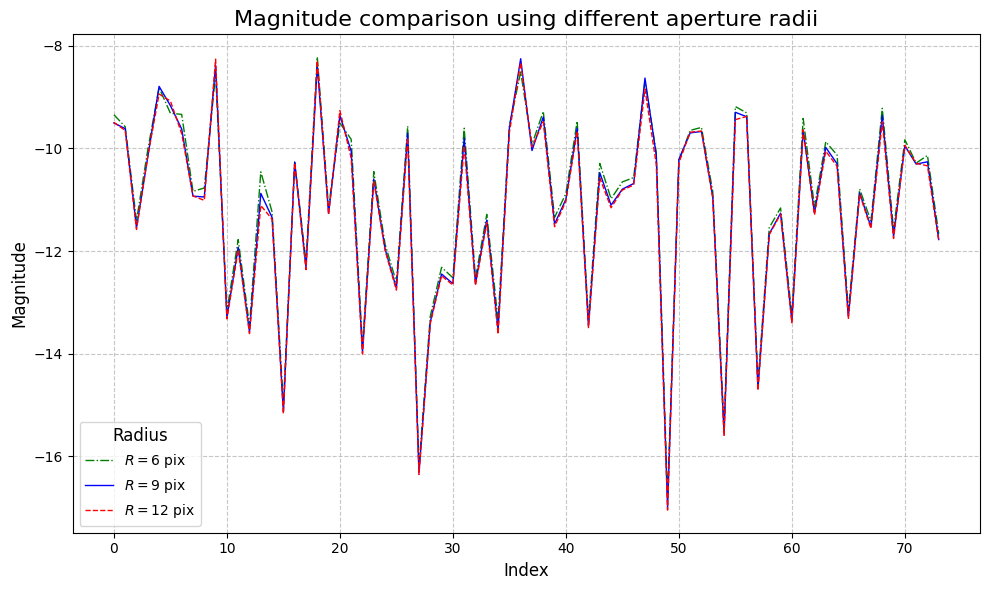

In [32]:
# Improved plot with customization
plt.figure(figsize=(10, 6))

# Plot data with labels, styles, and colors
#data1:FWHM = 3, R=9
#data2:FWHM = 4, R=12
#data3:FWHM = 2, R=6
plt.plot(data3['mag'], label=r'$R = 6$ pix', linestyle='-.', color='green', linewidth=1)
plt.plot(data1['mag'], label=r'$R = 9$ pix', linestyle='-', color='blue', linewidth=1)
plt.plot(data2['mag'], label=r'$R = 12$ pix', linestyle='--', color='red', linewidth=1)


# Adding titles and labels
plt.title('Magnitude comparison using different aperture radii', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)

# Adding grid for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adding a legend to differentiate the plots
plt.legend(title='Radius', fontsize=10, title_fontsize=12, loc='best')

# Show the plot
plt.tight_layout()
plt.show()

We do not always observe the same trend when looking at the inividual instrumental magnitudes measured using different radii for photometry. For individual flux measurements, a larger aperture radius does not always result in a more negative magnitude measurement (e.g., row 3).

<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2425/3648205497.py:29: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(data_path, sep='\s+')


Processing directory: 22_10_2023/photometry_fwhm2/
Processing directory: 22_10_2023/photometry_fwhm3/
Processing directory: 22_10_2023/photometry_fwhm4/
Processing directory: 22_10_2023/photometry_fwhm10/


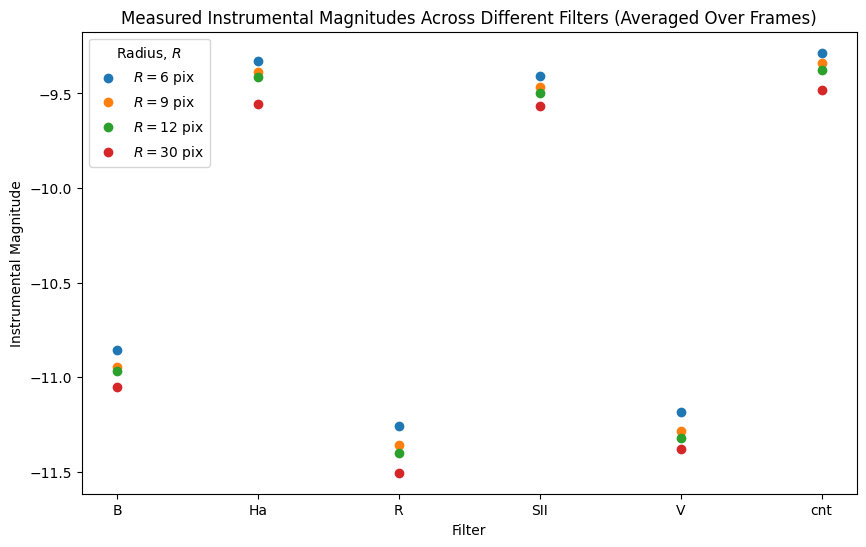

In [36]:
#now looping through all three directories to plot a comparison.

# List of directories to process
data_directories = [
    "22_10_2023/photometry_fwhm2/",
    "22_10_2023/photometry_fwhm3/",
    "22_10_2023/photometry_fwhm4/",
    "22_10_2023/photometry_fwhm10/"
]

labels = [r'$R = 6$ pix', r'$R = 9$ pix', r'$R = 12$ pix', r'$R = 30$ pix']

filenames = files_for_mrk335_sorted

# Initialize a dictionary to store averaged magnitudes for each directory
averaged_magnitudes_by_directory = {}

# Loop through each directory
for data_directory in data_directories:
    print(f"Processing directory: {data_directory}")

    # Initialize a dictionary to store magnitudes for each filter
    magnitudes_by_filter = {}
    
    # Process each file
    for filename in filenames:
        # Load data
        data_path = os.path.join(data_directory, filename)
        data = pd.read_csv(data_path, sep='\s+')
        
        # Extract the `data['mag']` column
        mag_column = data['mag']
        
        # Parse the filename to determine the filter
        match = re.match(r"Mrk335-\d{4}_(\w+)_cal_skyflat_wcs\.txt", filename)
        if match:
            filter_name = match.group(1)  # e.g., "B", "Ha", etc.
            
            # Add magnitudes to the corresponding filter in the dictionary
            if filter_name not in magnitudes_by_filter:
                magnitudes_by_filter[filter_name] = []
            magnitudes_by_filter[filter_name].extend(mag_column.values)
    
    # Compute the mean magnitude for each filter
    averaged_magnitudes = {filter_name: sum(mags) / len(mags) 
                           for filter_name, mags in magnitudes_by_filter.items()}
    
    # Save averaged magnitudes for the current directory
    averaged_magnitudes_by_directory[data_directory] = averaged_magnitudes

# Plot the results
plt.figure(figsize=(10, 6))

# Iterate through the directories and plot the averaged magnitudes
i=0
for directory, averaged_magnitudes in averaged_magnitudes_by_directory.items():
    filters = list(averaged_magnitudes.keys())
    magnitudes = list(averaged_magnitudes.values())
    
    # Plot the averaged magnitudes for this directory
    plt.scatter(filters, magnitudes, label=labels[i])
    i = i +1

plt.xlabel('Filter')
plt.ylabel('Instrumental Magnitude')
plt.title('Measured Instrumental Magnitudes Across Different Filters (Averaged Over Frames)')
plt.legend(title=r'Radius, $R$')
plt.show()

The same trend as previously highlighted is visible when looking at the average (mean) magnitude measured in each filter - the larger the radius for aperture photometry, the lower the instrumental magnitude, i.e. the brighter the source appears, due to the larger collecting area of the aperture.

## Instrumental Magnitudes and comparison for single object Mrk335

First, we must select our object from the data file.

In [37]:
#find our object
data1.columns

Index(['xpix', 'ypix', 'ID', 'RAJ2000', 'DECJ2000', 'flux_peak', 'flux',
       'flux_err', 'mag', 'mag_err', 'AIRMASS', 'FWHM', 'FILTER', 'MJD-HELIO',
       'DATE-OBS', 'flag'],
      dtype='object')

In [38]:
data1[['RAJ2000', 'DECJ2000']]

,RAJ2000,DECJ2000
0,1.530727,20.3102
1,1.500865,20.3101
2,1.623632,20.3090
3,1.619301,20.3072
4,1.612586,20.3050
...,...,...
69,1.507892,20.1045
70,1.697280,20.0977
71,1.467951,20.0977
72,1.675197,20.0922


Our object has coordinates:

RA = 00 06 19 = 1.5791667 deg <br>
DEC = +20 12 10 = 20.2027778 deg

(unit conversions made using https://www.astrouw.edu.pl/~jskowron/ra-dec/)

which we will use to locate it within our dataframe.

In [39]:
def find_closest_row(df, target_ra, target_dec, tolerance=0.01):
    """
    Finds the row in the DataFrame closest to the specified RAJ2000 and DECJ2000 values within a tolerance.

    Parameters:
        df (pd.DataFrame): The DataFrame containing RAJ2000 and DECJ2000 columns.
        target_ra (float): Target RAJ2000 value.
        target_dec (float): Target DECJ2000 value.
        tolerance (float): Maximum angular separation allowed, in degrees.

    Returns:
        pd.Series: The row closest to the specified RA and Dec values, or None if no match is found.
    """
    # Calculate angular separation
    ra_diff = df['RAJ2000'] - target_ra
    dec_diff = df['DECJ2000'] - target_dec
    separation = np.sqrt(ra_diff**2 + dec_diff**2)  # Approximation for small angular distances
    
    # Find rows within the specified tolerance
    closest_rows = df[separation <= tolerance]
    
    if not closest_rows.empty:
        # Return the row with the minimum separation
        closest_row = closest_rows.loc[separation.idxmin()]
        return closest_row
    else:
        return None

In [40]:
# find our object Mrk335
target_ra = 1.5791667 
target_dec = 20.2027778
tolerance = 0.01# Adjust the tolerance as needed

mrk335 = find_closest_row(data1, target_ra, target_dec, tolerance)
print(mrk335)

xpix                   1062.1736
ypix                    994.4028
ID                            35
RAJ2000                  1.58143
DECJ2000                  20.203
flux_peak              6960.2476
flux                 261064.2685
flux_err                725.0388
mag                     -13.5419
mag_err                    0.003
AIRMASS                   1.2272
FWHM                         3.0
FILTER                         B
MJD-HELIO           60239.775554
DATE-OBS     2023-10-22T18:27:21
flag                           0
Name: 34, dtype: object


In [41]:
print('The instrumental magnitude for Mrk335 in the B-band is: ', mrk335['mag'])

The instrumental magnitude for Mrk335 in the B-band is:  -13.5419


<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2425/3926448579.py:25: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(data_path, sep='\s+')


Processing directory: 22_10_2023/photometry_fwhm2/
Processing directory: 22_10_2023/photometry_fwhm3/
Processing directory: 22_10_2023/photometry_fwhm4/
Processing directory: 22_10_2023/photometry_fwhm10/


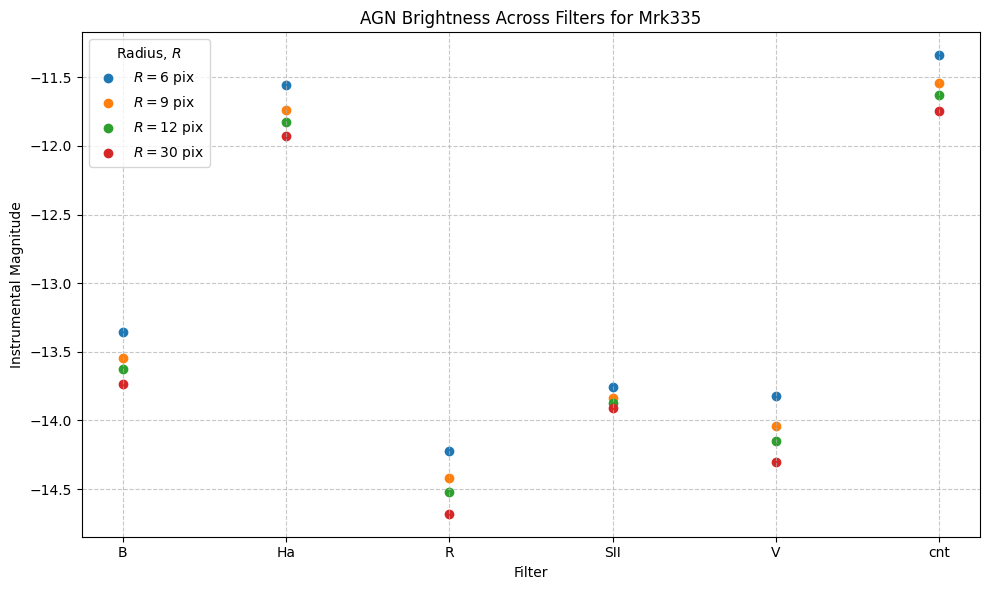

In [43]:
#now looping through all three directories to plot a comparison.

# List of directories to process
data_directories = [
    "22_10_2023/photometry_fwhm2/",
    "22_10_2023/photometry_fwhm3/",
    "22_10_2023/photometry_fwhm4/",
    "22_10_2023/photometry_fwhm10/"
]

labels = [r'$R = 6$ pix', r'$R = 9$ pix', r'$R = 12$ pix', r'$R = 30$ pix']

filenames = files_for_mrk335_sorted
# Dictionary to store magnitudes for each directory
magnitudes_by_directory = {}

# Loop through each directory
for data_directory in data_directories:
    print(f"Processing directory: {data_directory}")
    
    magnitudes_by_filter = {}
    
    for filename in filenames:
        data_path = os.path.join(data_directory, filename)
        data = pd.read_csv(data_path, sep='\s+')
        
        # Find the closest row matching the target coordinates
        closest_row = find_closest_row(data, target_ra, target_dec, tolerance)
        
        if closest_row is not None:
            # Parse the filter from the filename
            match = re.match(r"Mrk335-\d{4}_(\w+)_cal_skyflat_wcs\.txt", filename)
            if match:
                filter_name = match.group(1)  # e.g., "B", "Ha", etc.
                
                # Store the magnitude for the closest row
                if filter_name not in magnitudes_by_filter:
                    magnitudes_by_filter[filter_name] = []
                magnitudes_by_filter[filter_name].append(closest_row['mag'])
    
    # Store the magnitudes for the current directory
    magnitudes_by_directory[data_directory] = magnitudes_by_filter

# Plotting the results
plt.figure(figsize=(10, 6))

for i, (directory, magnitudes_by_filter) in enumerate(magnitudes_by_directory.items()):
    filters = list(magnitudes_by_filter.keys())
    magnitudes = [mags[0] for mags in magnitudes_by_filter.values()]  # Use the first magnitude for each filter
    
    plt.scatter(filters, magnitudes, label=labels[i])

plt.xlabel('Filter')
plt.ylabel('Instrumental Magnitude')
plt.title('AGN Brightness Across Filters for Mrk335')
plt.legend(title=r'Radius, $R$')
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The same trend as previously highlighted is visible when looking at the instrumental magnitude measured in each filter for Mrk335 - the larger the radius for aperture photometry, the lower the instrumental magnitude, i.e. the brighter the source appears, due to the larger collecting area of the aperture.

In [44]:
# instrumental magnitudes for Mrk335

data_directory = "22_10_2023/photometry_fwhm3/"  # continuing with default directory/FWHM/radius

# Initialize a dictionary to store magnitudes by filter
magnitudes_by_filter = {}

# Process each file in the directory
for filename in files_for_mrk335_sorted:
    data_path = os.path.join(data_directory, filename)
    data = pd.read_csv(data_path, sep='\s+')
    
    # Find the closest row matching the target coordinates
    closest_row = find_closest_row(data, target_ra, target_dec, tolerance)
    
    if closest_row is not None:
        # Parse the filter from the filename
        match = re.match(r"Mrk335-\d{4}_(\w+)_cal_skyflat_wcs\.txt", filename)
        if match:
            filter_name = match.group(1)  # e.g., "B", "Ha", etc.
            
            # Store the magnitude for the closest row
            magnitudes_by_filter[filter_name] = closest_row['mag']

# Display the results
print("Magnitudes for Mrk335 in each filter:")
for filter_name, magnitude in magnitudes_by_filter.items():
    print(f"Filter: {filter_name}, Magnitude: {magnitude:.4f}")

Magnitudes for Mrk335 in each filter:
Filter: B, Magnitude: -13.5543
Filter: Ha, Magnitude: -11.7281
Filter: R, Magnitude: -14.4462
Filter: SII, Magnitude: -13.8043
Filter: V, Magnitude: -14.0693
Filter: cnt, Magnitude: -11.5089


<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2425/817072651.py:11: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(data_path, sep='\s+')


## Task 3: Performing absolute calibration

In order to perform absolute photometric calibration, we need to identify a number of standard stars, which have already been defined in the observational proposal.

# Mrk335

RA = 00 06 19 = 1.5791667 deg <br>
DEC = +20 12 10 = 20.2027778 deg

Unit conversions made using https://www.astrouw.edu.pl/~jskowron/ra-dec/

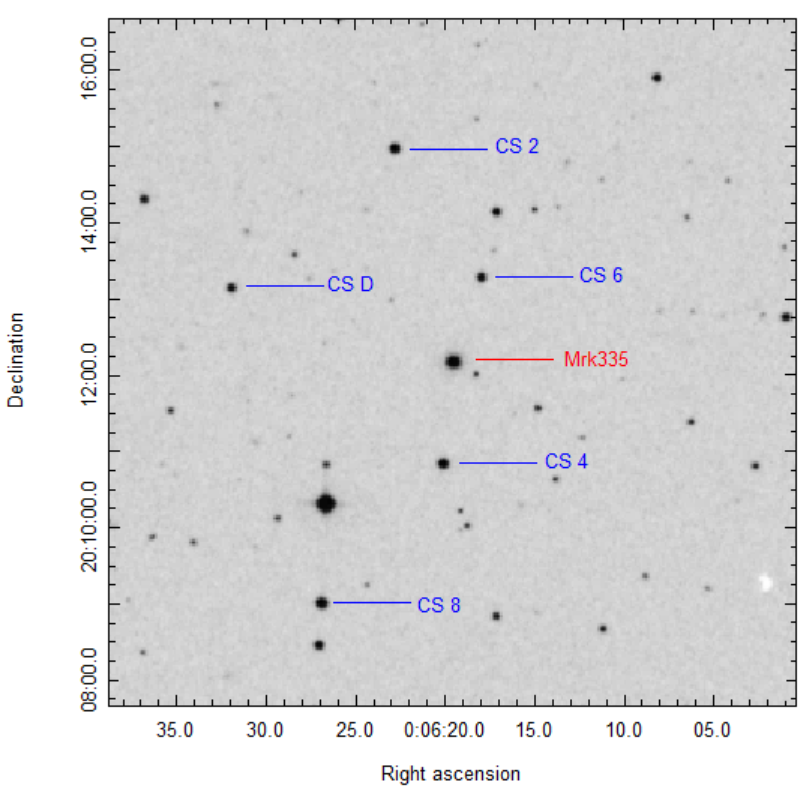

Our claibration stars, whose B and V magnitudes are retreived from the following paper:

Doroshenko, V. T., “BVRI CCD-photometry of comparison stars in the neighborhoods of galaxies with active nuclei. ii”, <i>Astrophysics</i>, vol. 48, no. 3, Springer, pp. 304–320, 2005. doi:10.1007/s10511-005-0029-0.

| CS # | Ra | Dec | Ra (deg) | Dec (deg) | B | V |
|-----------|----|----|-|-|-|-|
|4 |00 06 20.2 |+20 10 50.5| 1.5841667 | 20.1806944 |15.406|14.251|
|2 |00 06 22.9 |+20 14 58.8| 1.5954167 | 20.2496667 |14.883|14.229|
|6 |00 06 18.0 |+20 13 16.7| 1.5750000 | 20.2213056 |15.466|15.020|
|8 |00 06 26.9 |+20 09 01.6| 1.6120833 | 20.1504444 |14.190|13.558|
|D |00 06 32.0 |+20 13 08.3| 1.6333333 | 20.2189722 |16.244|15.429|

In [45]:
# Convert RA and Dec to decimal degrees for all calibration stars
def ra_dec_to_decimal(ra, dec):
    ra_h, ra_m, ra_s = map(float, ra.split())
    dec_d, dec_m, dec_s = map(float, dec.replace('+', '').replace('-', ' -').split())
    ra_decimal = (ra_h + ra_m / 60 + ra_s / 3600) * 15  # Convert hours to degrees
    dec_sign = -1 if '-' in dec else 1
    dec_decimal = dec_sign * (abs(dec_d) + dec_m / 60 + dec_s / 3600)
    return ra_decimal, dec_decimal

In [46]:
ra_dec_to_decimal('00 06 20.2', '+20 10 50.5')

(1.5841666666666667, 20.180694444444445)

In [47]:
# Calibration stars information
calibration_stars = [
    {'CS#': '4', 'RA': '00 06 20.2', 'Dec': '+20 10 50.5'},
    {'CS#': '2', 'RA': '00 06 22.9', 'Dec': '+20 14 58.8'},
    {'CS#': '6', 'RA': '00 06 18.0', 'Dec': '+20 13 16.7'},
    {'CS#': '8', 'RA': '00 06 26.9', 'Dec': '+20 09 01.6'},
    {'CS#': 'D', 'RA': '00 06 32.0', 'Dec': '+20 13 08.3'}
]


for star in calibration_stars:
    star['RA_decimal'], star['Dec_decimal'] = ra_dec_to_decimal(star['RA'], star['Dec'])

# Directory containing photometry files
base_dir = '22_10_2023/photometry_fwhm3'

# Initialize a DataFrame to store the results
results = []

# Loop through the files in the directory
for filename in os.listdir(base_dir):
    if filename.endswith('_cal_skyflat_wcs.txt'):
        # Determine the filter from the filename
        filter_name = filename.split('_')[1]

        # Read the file into a DataFrame
        file_path = os.path.join(base_dir, filename)
        df = pd.read_csv(file_path, sep='\s+')

        # Process each calibration star
        for star in calibration_stars:
            closest_row = find_closest_row(df, star['RA_decimal'], star['Dec_decimal'])
            if closest_row is not None:
                result = {
                    'CS#': star['CS#'],
                    'RA': star['RA'],
                    'Dec': star['Dec'],
                    f'{filter_name}_flux': closest_row['flux'],
                    f'{filter_name}_mag': closest_row['mag']
                }
                results.append(result)

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Merge results for each filter
final_results = results_df.groupby(['CS#', 'RA', 'Dec']).first().reset_index()

#show final results
final_results

<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2425/1388465732.py:28: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep='\s+')


,CS#,RA,Dec,SII_flux,SII_mag,B_flux,B_mag,V_flux,V_mag,cnt_flux,cnt_mag,R_flux,R_mag,Ha_flux,Ha_mag
0,2,00 06 22.9,+20 14 58.8,82646.4682,-12.2931,404817.2646,-14.0181,7.304648e+05,-14.6590,77317.3558,-12.2207,9.073473e+05,-14.8944,80469.3362,-12.2641
1,4,00 06 20.2,+20 10 50.5,105527.7995,-12.5584,252524.6462,-13.5058,7.071083e+05,-14.6237,93469.3180,-12.4267,1.095690e+06,-15.0992,103910.5352,-12.5416
2,6,00 06 18.0,+20 13 16.7,35474.0373,-11.3748,235642.8741,-13.4306,3.513588e+05,-13.8644,33576.4125,-11.3151,3.994397e+05,-14.0036,33454.4978,-11.3111
3,8,00 06 26.9,+20 09 01.6,151719.7431,-12.9526,777249.9010,-14.7264,1.367753e+06,-15.3400,141843.9258,-12.8795,1.649272e+06,-15.5432,148359.1520,-12.9283
4,D,00 06 32.0,+20 13 08.3,29647.5558,-11.1800,116539.9495,-12.6662,2.434981e+05,-13.4662,27571.7269,-11.1012,3.229546e+05,-13.7729,29936.9076,-11.1905


In [48]:
# So, using these measured magnitudes and the ones given, we need to find the difference.

# Additional data to merge
additional_data = pd.DataFrame([
    {'CS#': '4', 'B': 15.406, 'V': 14.251},
    {'CS#': '2', 'B': 14.883, 'V': 14.229},
    {'CS#': '6', 'B': 15.466, 'V': 15.020},
    {'CS#': '8', 'B': 14.190, 'V': 13.558},
    {'CS#': 'D', 'B': 16.244, 'V': 15.429}
])

# Merge the additional data with the final results
working_df = pd.merge(final_results, additional_data, on=['CS#'], how='left')
working_df.drop(['SII_flux', 'B_flux', 'V_flux', 'cnt_flux', 'R_flux'],axis = 1,inplace=True)

# show final results
working_df

,CS#,RA,Dec,SII_mag,B_mag,V_mag,cnt_mag,R_mag,Ha_flux,Ha_mag,B,V
0,2,00 06 22.9,+20 14 58.8,-12.2931,-14.0181,-14.6590,-12.2207,-14.8944,80469.3362,-12.2641,14.883,14.229
1,4,00 06 20.2,+20 10 50.5,-12.5584,-13.5058,-14.6237,-12.4267,-15.0992,103910.5352,-12.5416,15.406,14.251
2,6,00 06 18.0,+20 13 16.7,-11.3748,-13.4306,-13.8644,-11.3151,-14.0036,33454.4978,-11.3111,15.466,15.020
3,8,00 06 26.9,+20 09 01.6,-12.9526,-14.7264,-15.3400,-12.8795,-15.5432,148359.1520,-12.9283,14.190,13.558
4,D,00 06 32.0,+20 13 08.3,-11.1800,-12.6662,-13.4662,-11.1012,-13.7729,29936.9076,-11.1905,16.244,15.429


In [49]:
working_df['B_corr'] = working_df['B'] - working_df['B_mag']
working_df['V_corr'] = working_df['V'] - working_df['V_mag']

In [50]:
working_df

,CS#,RA,Dec,SII_mag,B_mag,V_mag,cnt_mag,R_mag,Ha_flux,Ha_mag,B,V,B_corr,V_corr
0,2,00 06 22.9,+20 14 58.8,-12.2931,-14.0181,-14.6590,-12.2207,-14.8944,80469.3362,-12.2641,14.883,14.229,28.9011,28.8880
1,4,00 06 20.2,+20 10 50.5,-12.5584,-13.5058,-14.6237,-12.4267,-15.0992,103910.5352,-12.5416,15.406,14.251,28.9118,28.8747
2,6,00 06 18.0,+20 13 16.7,-11.3748,-13.4306,-13.8644,-11.3151,-14.0036,33454.4978,-11.3111,15.466,15.020,28.8966,28.8844
3,8,00 06 26.9,+20 09 01.6,-12.9526,-14.7264,-15.3400,-12.8795,-15.5432,148359.1520,-12.9283,14.190,13.558,28.9164,28.8980
4,D,00 06 32.0,+20 13 08.3,-11.1800,-12.6662,-13.4662,-11.1012,-13.7729,29936.9076,-11.1905,16.244,15.429,28.9102,28.8952


Now, we perform this correction on the measurements for Mrk335 to calculate its absolute magnitude, combining our results from all standard stars by taking the mean correction.

In [59]:
#now perform this correction on Mrk335 to obtain absolute magnitude.

#first, average these corrections:

avg_B_corr = working_df['B_corr'].mean()
print('Average B correction: ', avg_B_corr)

avg_V_corr = working_df['V_corr'].mean()
print('Average V correction: ', avg_V_corr)

Average B correction:  28.907219999999995
Average V correction:  28.888059999999996


In [60]:
magnitudes_by_filter

{'B': -13.5543,
 'Ha': -11.7281,
 'R': -14.4462,
 'SII': -13.8043,
 'V': -14.0693,
 'cnt': -11.5089}

In [63]:
abs_mag = []

abs_mag.append(magnitudes_by_filter['B'] + avg_B_corr)
abs_mag.append(magnitudes_by_filter['V'] + avg_V_corr)

print(abs_mag)

[15.352919999999996, 14.818759999999996]


In [64]:
print('Absolute (corrected) B-magnitude for object = ', abs_mag[0])
print('Absolute (corrected) V-magnitude for object = ', abs_mag[1])

Absolute (corrected) B-magnitude for object =  15.352919999999996
Absolute (corrected) V-magnitude for object =  14.818759999999996


We compare these values to the database values from SIMBAD (https://simbad.u-strasbg.fr/simbad/sim-basic?Ident=Mrk+335), which cite $B = 14.19$ and $V = 13.85$.

# Tools
1. Pipeline for 1.4 Milankovic telescope: https://github.com/anavudragovic/pipeline  
2. CCD Data Reduction Guide http://www.astropy.org/ccd-reduction-and-photometry-guide/v/dev/notebooks/00-00-Preface.html 
3. Photutils is an  affiliated package of Astropy that primarily provides tools for detecting and 
performing photometry of astronomical sources https://photutils.readthedocs.io/en/stable/ 
4. https://gitlab.com/VoltarCH/milankovic-telescope-reduction-pipeline/blob/master/main.py 
5. https://github.com/anavudragovic/vidojevica 
6. Stellar aperture photometry https://github.com/anavudragovic/photometry 
7. CCD Reduction with IRAF: https://home.ifa.hawaii.edu/users/meech/a399/handouts/ccduser3.pdf